Introduction: Briefly describe the project domain, the dataset, your hypotheses, and the classification task you implemented. More specifically:
Why is the domain important to you and why you are researching in this domain

What is the dataset format (e.g. CSV files, JSON files, a mix of the two, etc.)

What tables (emphasis on the plural here) are included in the dataset

How is the data in each table collected

How many instances are there in each table

Include a brief description of the attributes

What are you trying to classify in the dataset

What are potential impacts of the results

Who are stakeholders interested in your results


We are analyzing our spotify data in order to predict s&p 500 performance based on the genre of music we listened to per day.

The data is in a mix of json and csv formats.

There are days of the week table, and multiple spotify listening history tables, and a table of s&p 500 performance.

The spotify data is collected from spotify.com and the spotify api, and the s&p 500 data is from yahoo finance.

The spotify data includes over a year of instances, but we narrowed it to listening data from 50 weekdays (2021-12-12 to 2022-02-27) in order to get more accurate predictions with less noise, and matchup with the stock market schedule.

The attributes are: date, most listened to artist, most listened to genre

We are trying to classify stock market performance.

The potential impacts are we could possibly find out the genre we are listening to is correlated with the stock market.

The stakeholders are us, and possibly psychologists/music therapists who want to how the stock market influences music taste.

## Cleaning the data

In the original spotify the date included the date as well as the end time given in coordinated universal time. So cleaning the we did was split the data off into its own column.
we also dropped columns such as the name of song and the miliseconds played.

#### Mergeing
We merged using an inner join on the date, this also functioned to get rid of days where no data had been collected. 

#### Challenges faced
We were trying to use an API that gave data on the stock market, but the API's we found had a limited number of request that we could use. Becuase the spotify data is so extensive, we had to branch away from using the API and instead made a csv file that contained stock information. One of the biggest problem when preparing the data was trying to get the dates from the spotify data to match with the dates for our stock market data. As many of you are probably aware, the stock market does not opperate on the weekends or on holidays, so when trying to compare dates, we had to drop those dates from the spotify data.

To fix this we used a csv file that gave the days of week with the date.

In [1]:
import pandas as pd
csv_file = pd.read_csv("DaysofWeek.csv")
print(csv_file)

          date days of week
0   2021-12-15    Wednesday
1   2021-12-16     Thursday
2   2021-12-17       Friday
3   2021-12-18     Saturday
4   2021-12-19       Sunday
..         ...          ...
70  2022-02-23    Wednesday
71  2022-02-24     Thursday
72  2022-02-25       Friday
73  2022-02-26     Saturday
74  2022-02-27       Sunday

[75 rows x 2 columns]


After appending that on to our original data frame, we could use groupby and get_group to create a new data from that only contains the weekdays, then from that data frame we had to hard code in order to drop the dates that were holidays and not in our stock data, an example of that is Chrismas Eve.

## Some interesting stuff 
Since we had different spotify data so here is a visualization of the number of unique genres we listen to, this is one way to see who has a more diverse music taste.

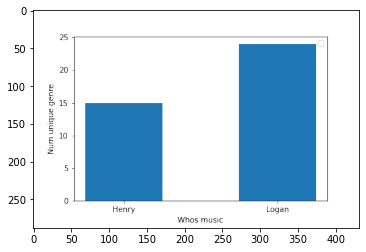

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("unique_genre_bar.png")
plt.imshow(img)
plt.show()

based of of this Logan has a more diverse music taste, at least during the 2 1/2 months of data that we are viewing.